# Домашнее задание 5. Градиентный спуск. (10 баллов + 2 балла бонус)

В этом домашнем задании вы реализуете градиентный спуск для линейной регрессии, а также изучите, как он ведёт себя при разных параметрах и с разными функциями потерь.

Правила:

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания всем участникам нарушения будет выставлено 0 баллов, независимо от того, кто у кого списывал.

* Старайтесь сделать код максимально оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, рассмотренных в курсе.  

In [ ]:
from typing import Iterable, List

import matplotlib.pyplot as plt
import numpy as np

## Часть 1. Градиентный спуск (5 баллов)

Для начала давайте вспомним самый простой функционал ошибки, который мы применяем в задаче регрессии — **Mean Squared Error (MSE)**:

$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2
$$

где $x_i$ — это $i$-ый объект датасета, $y_i$ — правильный ответ для $i$-го объекта, а $w$ — веса нашей линейной модели.

Как мы помним, для линейной модели его можно записать в матричном виде вот так:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2
$$

где $X$ — это матрица объекты-признаки, а $y$ — вектор правильных ответов.

Чтобы воспользоваться методом градиентного спуска, нам нужно посчитать градиент нашего функционала. Для MSE он будет выглядеть так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y)
$$

Ниже приведён базовый класс `BaseLoss`, который мы будем использовать для реализации всех наших лоссов. Менять его **не нужно**. У него есть два абстрактных метода:
1. Метод `calc_loss`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения лосса.
2. Метод `calc_grad`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять градиент функции потерь по параметрам модели.

In [ ]:
import abc


class BaseLoss(abc.ABC):
    """Базовый класс лосса"""

    @abc.abstractmethod
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число - значения функции потерь
        """
        raise NotImplementedError

    @abc.abstractmethod
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        raise NotImplementedError

Теперь давайте напишем реализацию этого абстрактного класса: Mean Squared Error лосс.

**Задание 1.1 (5/8 балла):** Реализуйте класс `MSELoss`.

Он должен вычислять лосс и градиент по формулам наверху.

In [ ]:
class MSELoss(BaseLoss):
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """

        predict = np.dot(X, w)
        loss = np.mean((predict - y) ** 2)
        return loss

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """

        l = X.shape[0]
        predict = np.dot(X, w)
        grad = (2 / l) * np.dot(X.T, (predict - y))
        return grad

Теперь мы можем создать объект `MSELoss` и при помощи него вычислять значение нашей функции потерь и градиенты:

In [ ]:
# Создадим объект лосса
loss = MSELoss()

# Создадим какой-то датасет
X = np.arange(200).reshape(20, 10)
y = np.arange(20)

# Создадим какой-то вектор весов
w = np.arange(10)

# Выведем значение лосса и градиента на этом датасете с этим вектором весов
print(loss.calc_loss(X, y, w))
print(loss.calc_grad(X, y, w))

# Проверка, что методы реализованы правильно
assert loss.calc_loss(X, y, w) == 27410283.5, "Метод calc_loss реализован неверно"
assert np.allclose(
    loss.calc_grad(X, y, w),
    np.array(
        [
            1163180.0,
            1172281.0,
            1181382.0,
            1190483.0,
            1199584.0,
            1208685.0,
            1217786.0,
            1226887.0,
            1235988.0,
            1245089.0,
        ]
    ),
), "Метод calc_grad реализован неверно"
print("Всё верно!")

27410283.5
[1163180. 1172281. 1181382. 1190483. 1199584. 1208685. 1217786. 1226887.
 1235988. 1245089.]
Всё верно!


Теперь когда у нас есть всё для вычисления градиента, давайте напишем наш градиентный спуск. Напомним, что формула для одной итерации градиентного спуска выглядит следующим образом:

$$
w^{t+1} = w^{t} - \eta \nabla_{w} Q(w^{t}, X, y)
$$

Где $w^t$ — значение вектора весов на $t$-ой итерации, а $\eta$ — параметр learning rate, отвечающий за размер шага.

**Задание 1.2 (5/8 балла):** Реализуйте функцию `gradient_descent`.

Функция должна принимать на вход начальное значение весов линейной модели `w_init`, матрицу объектов-признаков `X`,
вектор правильных ответов `y`, объект функции потерь `loss`, размер шага `lr` и количество итераций `n_iterations`.

Функция должна реализовывать цикл, в котором происходит шаг градиентного спуска (градиенты берутся из `loss` посредством вызова метода `calc_grad`) по формуле выше, и возвращать
траекторию спуска (список из новых значений весов на каждом шаге).

In [ ]:
def gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    n_iterations: int = 100000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) - начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) - матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) - вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param n_iterations: int --сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) - история весов на каждом шаге
    """

    wt = w_init.copy()
    story = [wt.copy()]

    for _ in range(n_iterations):
        grad = loss.calc_grad(X, y, wt)
        wt = wt - lr * grad
        story.append(wt.copy())

    return story

Теперь создадим синтетический датасет и функцию, которая будет рисовать траекторию градиентного спуска по истории.

In [ ]:
# Создаём датасет из двух переменных и реального вектора зависимости w_true

np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features,))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :] # разные масштабы признаков
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

print(X.shape)
print(y.shape)

(300, 2)
(300,)


In [ ]:
loss = MSELoss()
w_list = gradient_descent(w_init, X, y, loss, 0.01, 100)
print(loss.calc_loss(X, y, w_list[0]))
print(loss.calc_loss(X, y, w_list[-1]))

425.58917680450253
0.8670644395649493


In [ ]:
def plot_gd(w_list: Iterable, X: np.ndarray, y: np.ndarray, loss: BaseLoss):
    """
    Функция для отрисовки траектории градиентного спуска
    :param w_list: Список из объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать лосс при помощи loss.calc_loss(X, y, w)
    """
    w_list = np.array(w_list)
    meshgrid_space = np.linspace(-2, 2, 100)
    A, B = np.meshgrid(meshgrid_space, meshgrid_space)

    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = loss.calc_loss(X, y, w_tmp)

    plt.figure(figsize=(15, 6))
    plt.title("GD trajectory")
    plt.xlabel(r"$w_1$")
    plt.ylabel(r"$w_2$")
    plt.xlim(w_list[:, 0].min() - 0.1, w_list[:, 0].max() + 0.1)
    plt.ylim(w_list[:, 1].min() - 0.1, w_list[:, 1].max() + 0.1)
    plt.gca().set_aspect("equal")

    # Отображение уровня функции потерь
    CS = plt.contour(
        A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r
    )
    CB = plt.colorbar(CS, shrink=0.8, extend="both")

    # Отображение траектории спуска
    plt.scatter(w_list[:, 0], w_list[:, 1])
    plt.plot(w_list[:, 0], w_list[:, 1])

    plt.show()

**Задание 1.3 (5/8 балла):** При помощи функций `gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`). Используйте четыре и более различных значений для `lr`.

Сделайте и опишите свои выводы о том, как параметр `lr` влияет на поведение градиентного спуска.

Подсказки:
* Функция `gradient_descent` возвращает историю весов, которую нужно подать в функцию `plot_gd`.
* Хорошие значения для `lr` могут лежать в промежутке от 0.0001 до 0.1.

Learning rate: 0.0001


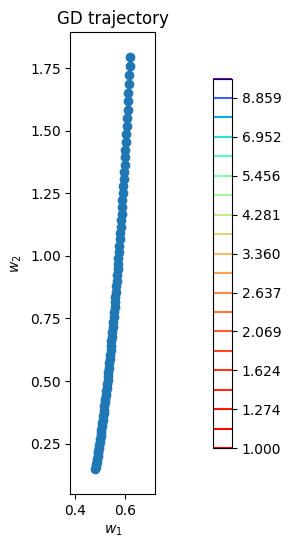

Learning rate: 0.005


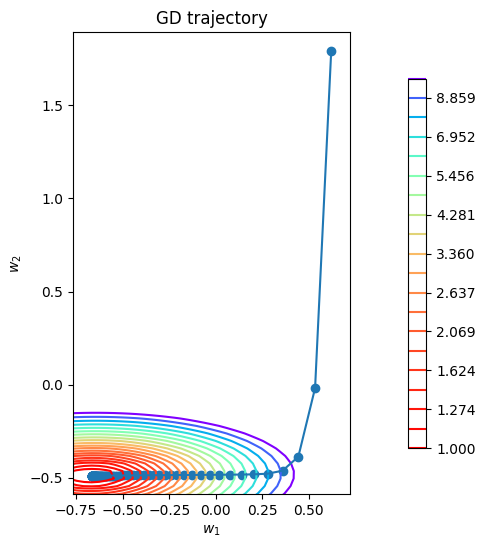

Learning rate: 0.001


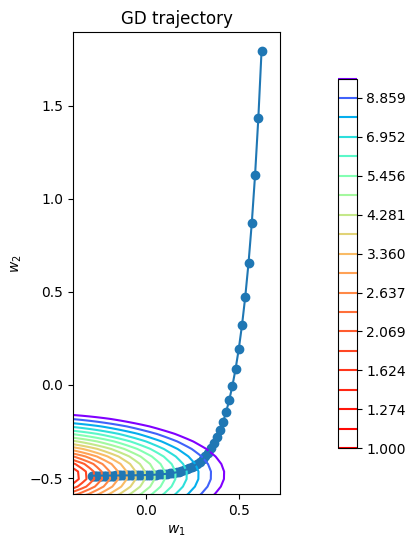

Learning rate: 0.005


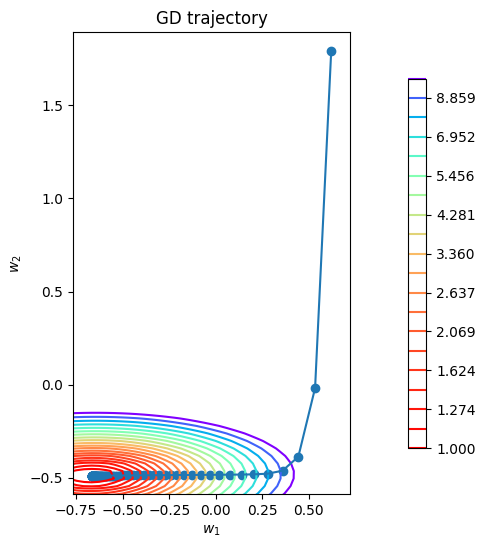

Learning rate: 0.01


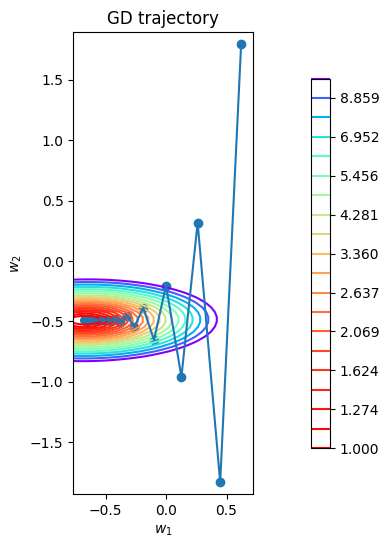

Learning rate: 0.012


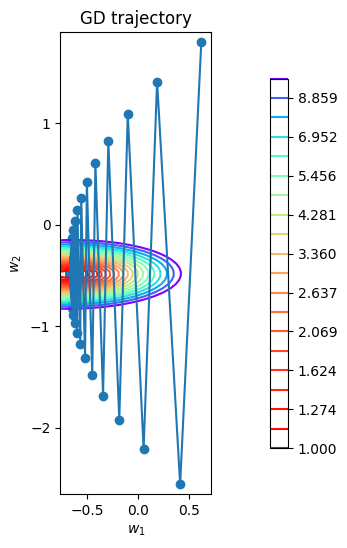

In [ ]:
learning_rates = [0.0001, 0.005, 0.001, 0.005, 0.01, 0.012]

for lr in learning_rates:
    print(f"Learning rate: {lr}")
    story = gradient_descent(w_init, X, y, loss, lr, 80)
    plot_gd(story, X, y, loss)

Размер шага алгоритма при движении к минимуму функции потерь. Соттветственно, при малом размере шага график плавный и происходит медленное движение к минимуму, из-за чего требуется большое число итераций. При средних значениях путь более быстрый и без сильных колебаний. При большом же значении шага заметны сильные колебания вокруг минимума (при дальнейшем увеличении шага может наблюдаться несходимость).

Теперь реализуем стохастический градиентный спуск.

**Задание 1.4 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent`.

Функция должна принимать все те же параметры, что и функция `gradient_descent`, но ещё параметр `batch_size`, отвечающий за размер батча.

Функция должна как и раньше реализовывать цикл, в котором происходит шаг градиентного спуска, но на каждом шаге считать градиент не по всей выборке `X`, а только по случайно выбранной части.

Подсказка: для выбора случайной части можно использовать [`np.random.choice`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) с правильным параметром `size`, чтобы выбрать случайные индексы, а потом проиндексировать получившимся массивом массив `X`:
```
batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
batch = X[batch_indices]
```

In [ ]:
def stochastic_gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """

    wt = w_init.copy()
    story = [wt.copy()]

    for _ in range(n_iterations):
        batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
        X_batch = X[batch_indices]
        y_batch = y[batch_indices]

        grad = loss.calc_grad(X_batch, y_batch, wt)
        wt = wt - lr * grad
        story.append(wt.copy())

    return story

**Задание 1.5 (5/8 балла):** При помощи функций `stochastic_gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`) и размера подвыборки (параметра `batch_size`). Используйте не менее четырёх разных значений для `lr` и `batch_size`.

Сделайте и опишите свои выводы о том, как параметры  `lr` и `batch_size` влияют на поведение стохастического градиентного спуска. Как отличается поведение стохастического градиентного спуска от обычного? Что происходит при малых и больших `batch_size`?

Обратите внимание, что в нашем датасете всего 300 объектов, так что `batch_size` больше этого числа не будет иметь смысла.

Learning rate: 0.0001
Batch size: 1


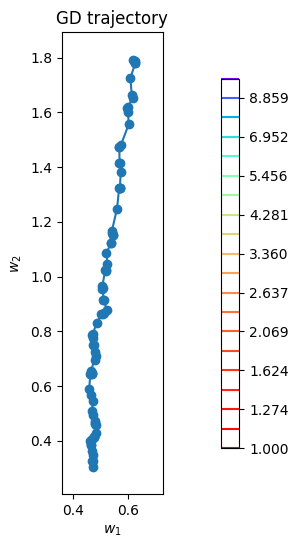

Learning rate: 0.0001
Batch size: 10


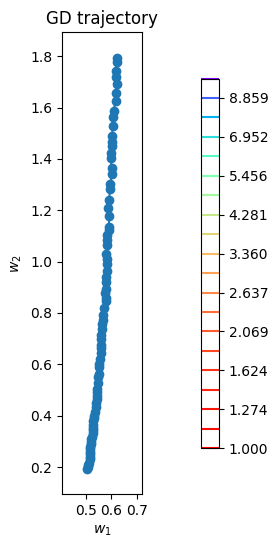

Learning rate: 0.0001
Batch size: 50


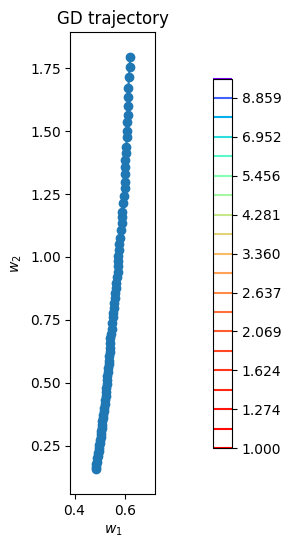

Learning rate: 0.0001
Batch size: 100


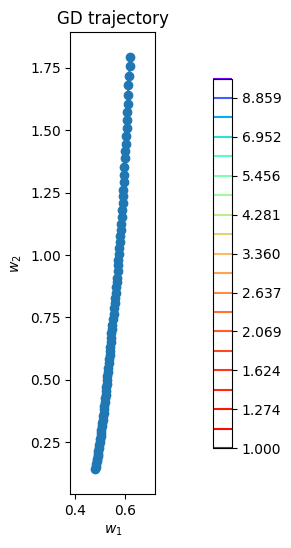

Learning rate: 0.0001
Batch size: 150


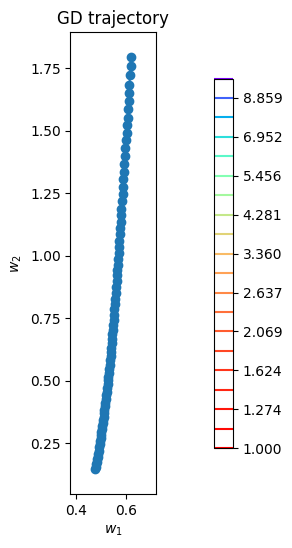

Learning rate: 0.0001
Batch size: 200


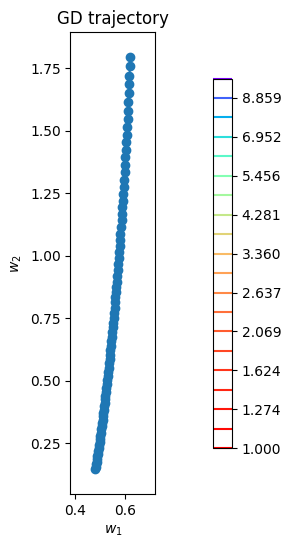

Learning rate: 0.0001
Batch size: 250


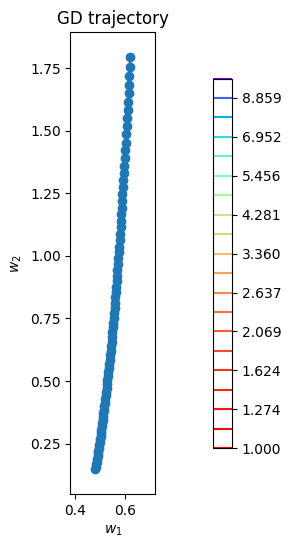

Learning rate: 0.0001
Batch size: 300


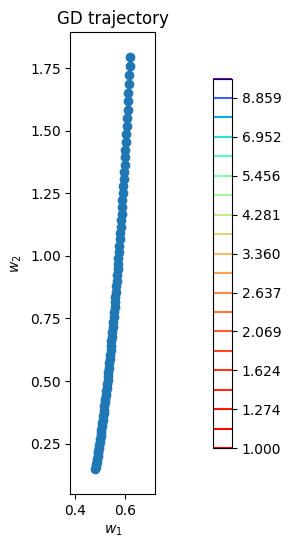

Learning rate: 0.005
Batch size: 1


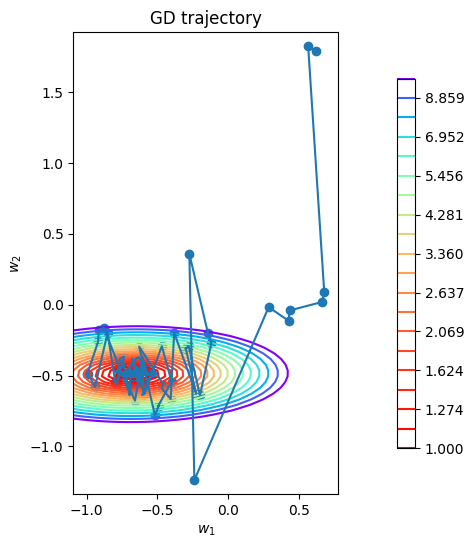

Learning rate: 0.005
Batch size: 10


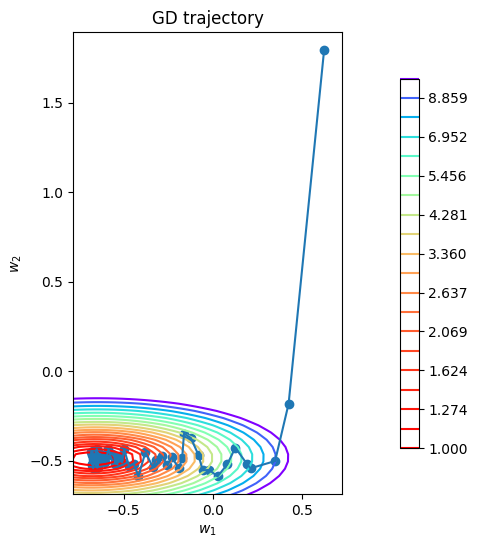

Learning rate: 0.005
Batch size: 50


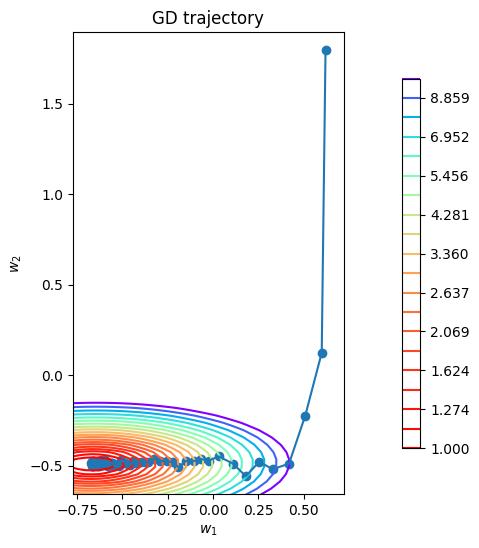

Learning rate: 0.005
Batch size: 100


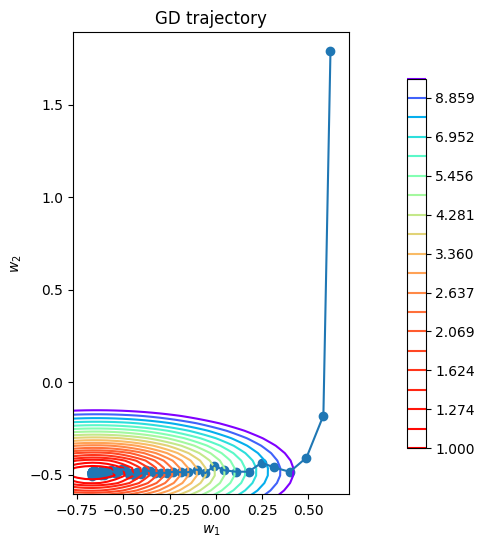

Learning rate: 0.005
Batch size: 150


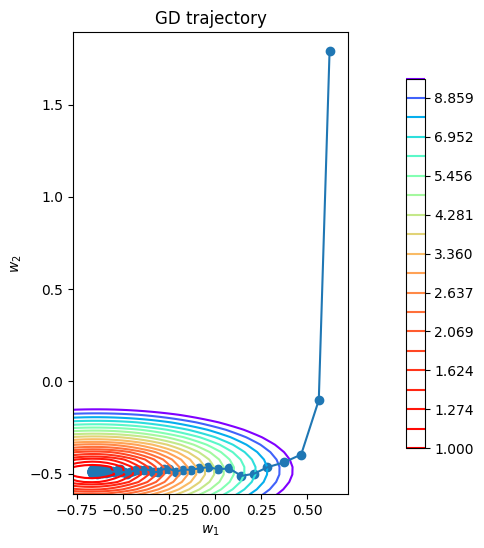

Learning rate: 0.005
Batch size: 200


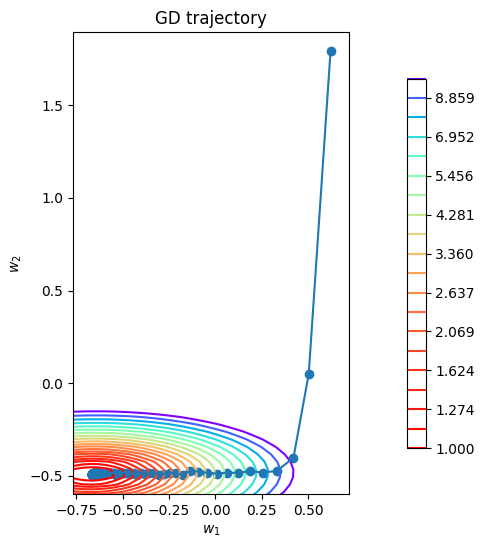

Learning rate: 0.005
Batch size: 250


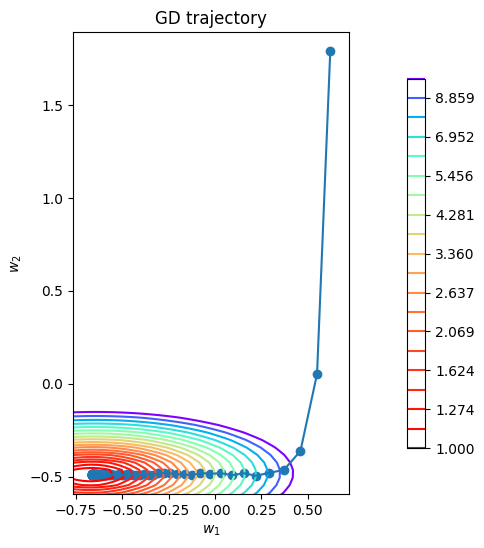

Learning rate: 0.005
Batch size: 300


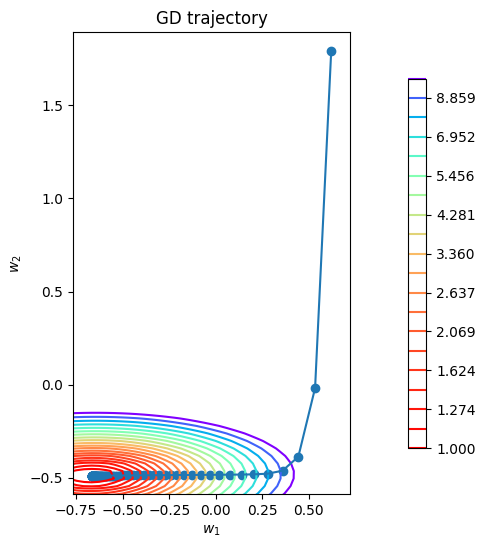

Learning rate: 0.001
Batch size: 1


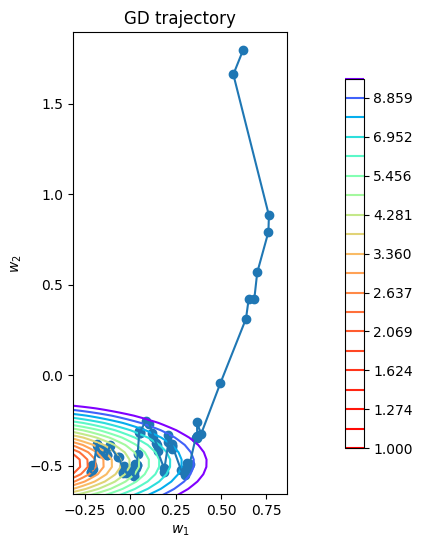

Learning rate: 0.001
Batch size: 10


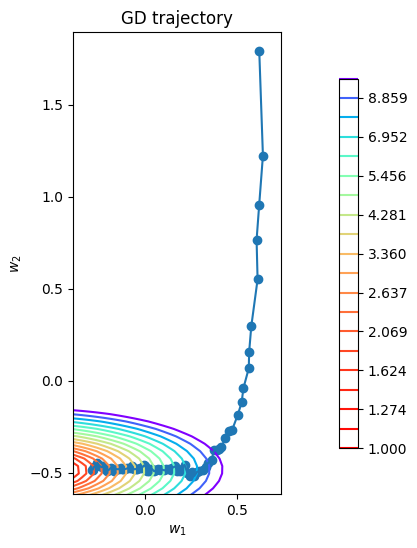

Learning rate: 0.001
Batch size: 50


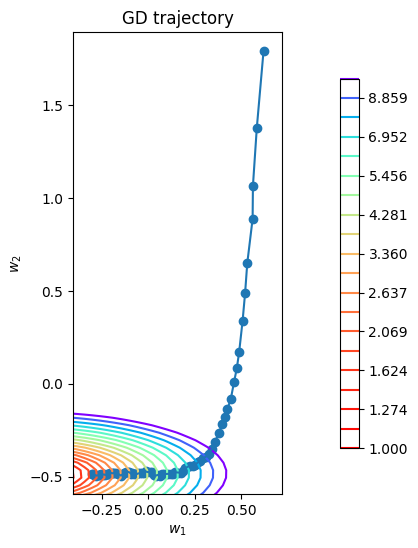

Learning rate: 0.001
Batch size: 100


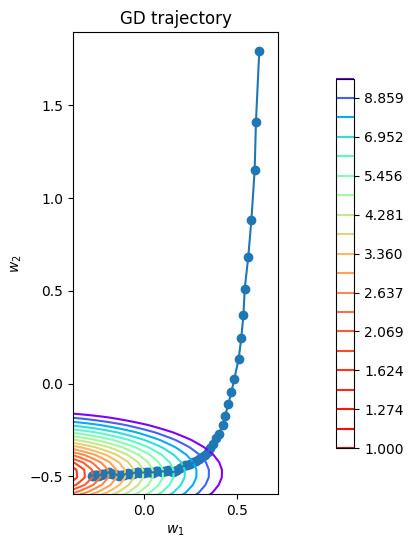

Learning rate: 0.001
Batch size: 150


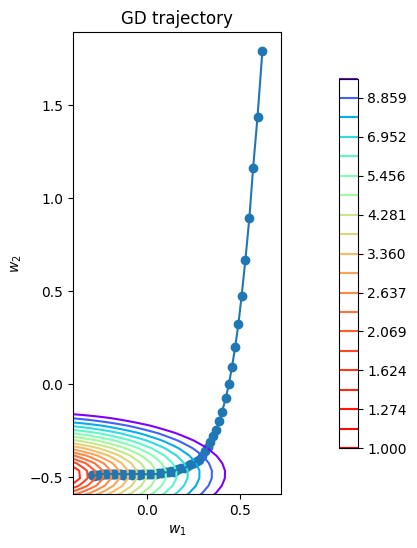

Learning rate: 0.001
Batch size: 200


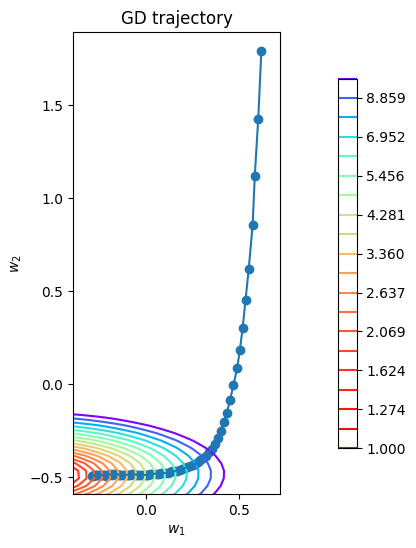

Learning rate: 0.001
Batch size: 250


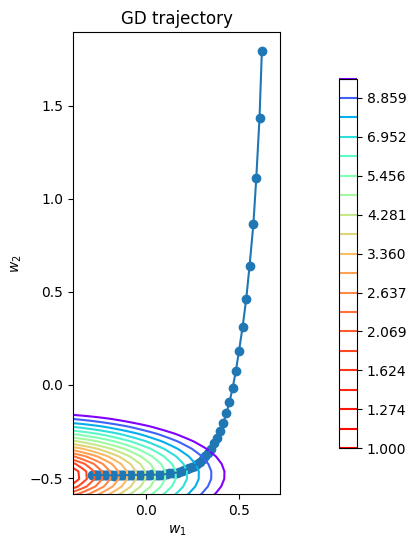

Learning rate: 0.001
Batch size: 300


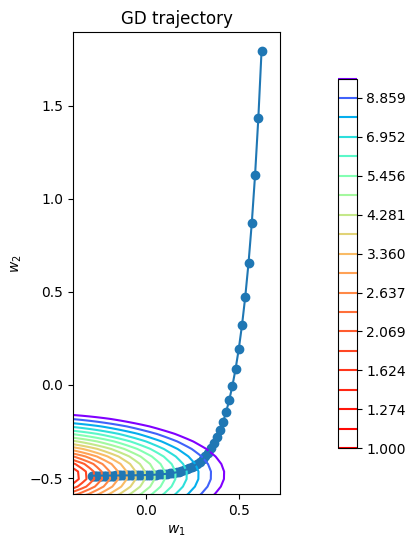

Learning rate: 0.005
Batch size: 1


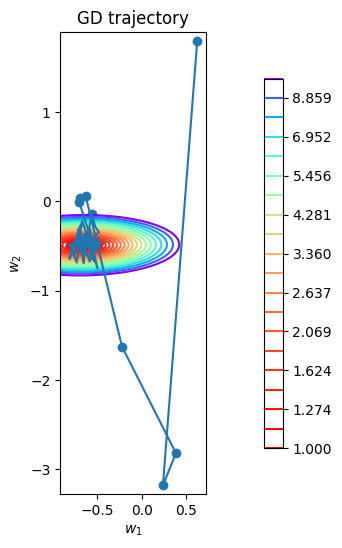

Learning rate: 0.005
Batch size: 10


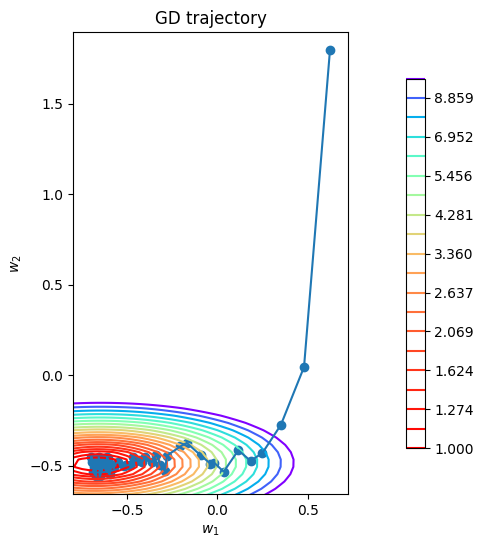

Learning rate: 0.005
Batch size: 50


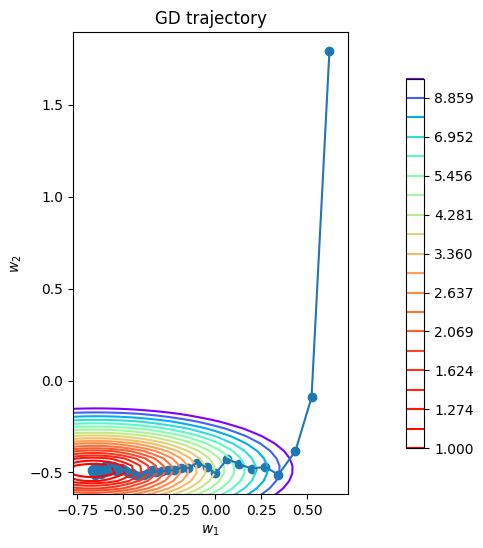

Learning rate: 0.005
Batch size: 100


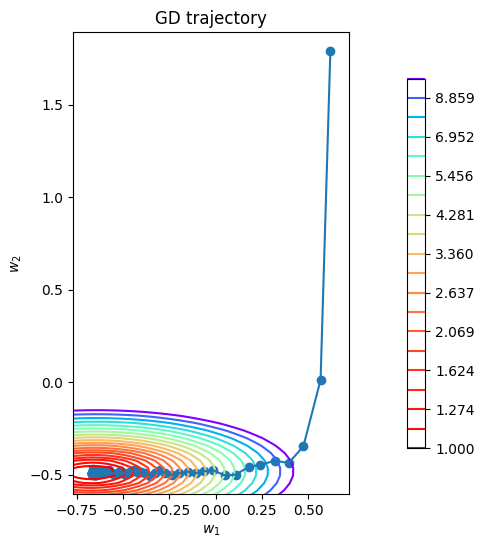

Learning rate: 0.005
Batch size: 150


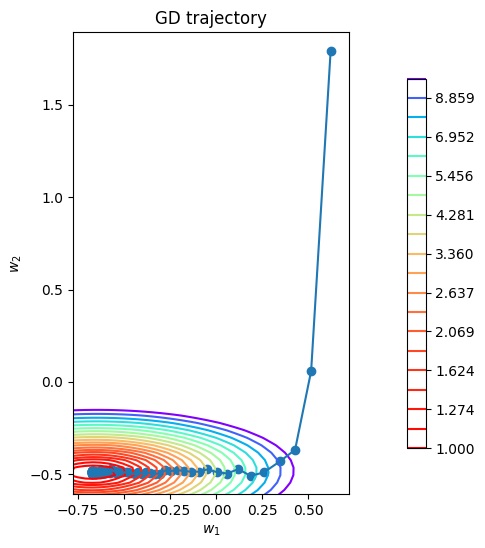

Learning rate: 0.005
Batch size: 200


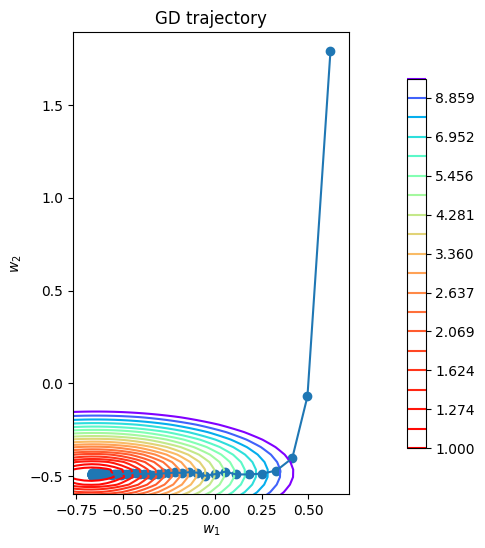

Learning rate: 0.005
Batch size: 250


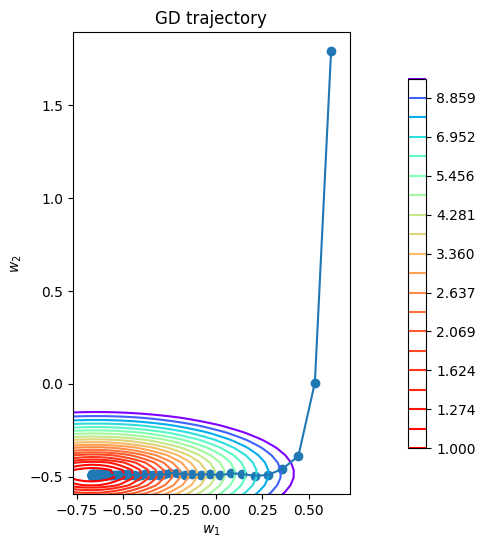

Learning rate: 0.005
Batch size: 300


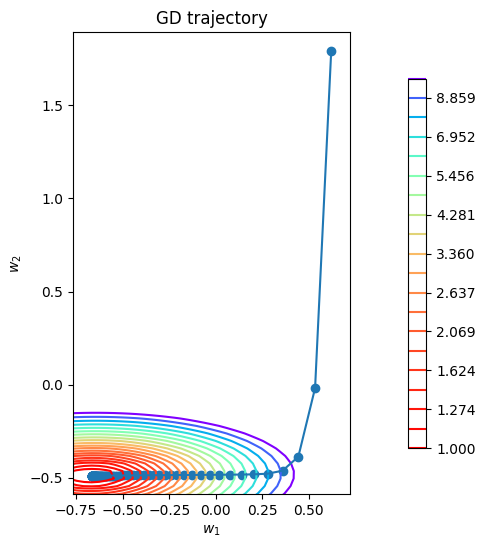

Learning rate: 0.01
Batch size: 1


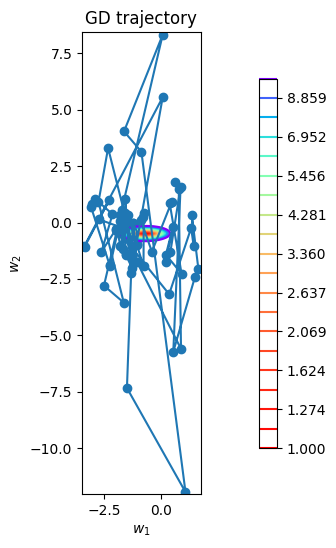

Learning rate: 0.01
Batch size: 10


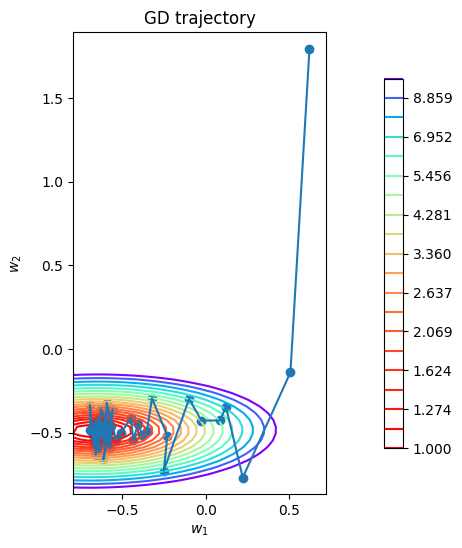

Learning rate: 0.01
Batch size: 50


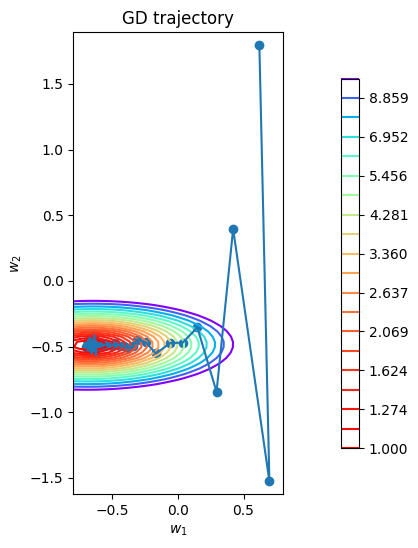

Learning rate: 0.01
Batch size: 100


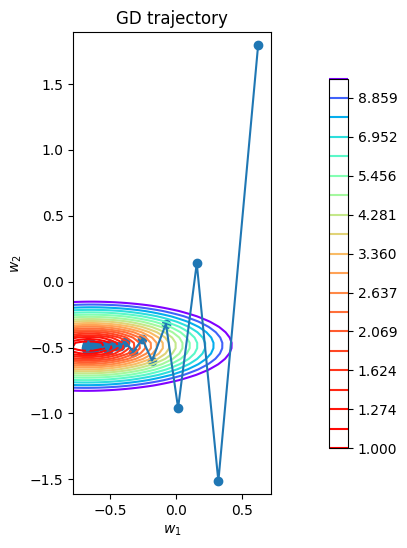

Learning rate: 0.01
Batch size: 150


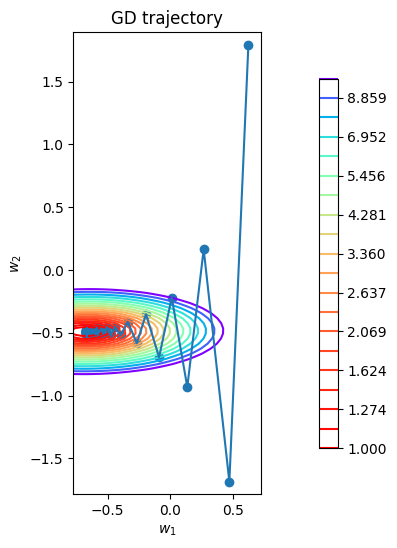

Learning rate: 0.01
Batch size: 200


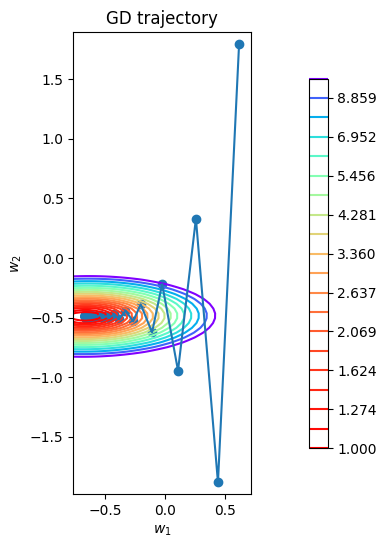

Learning rate: 0.01
Batch size: 250


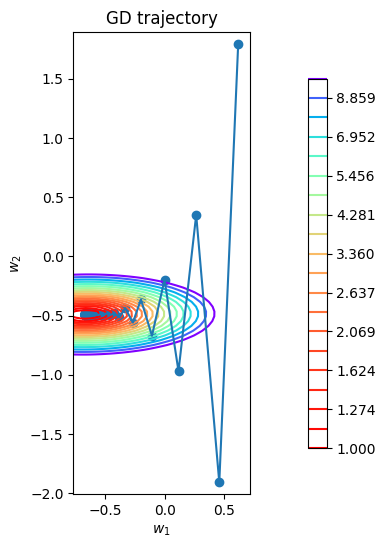

Learning rate: 0.01
Batch size: 300


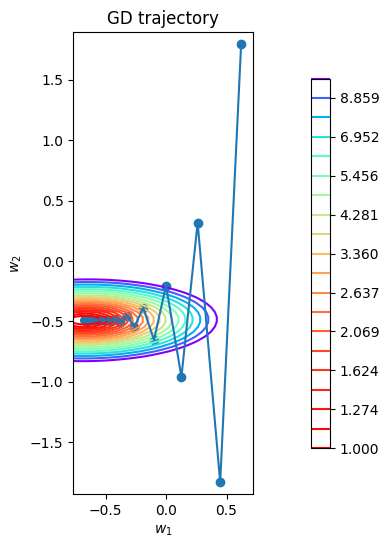

In [ ]:
learning_rates = [0.0001, 0.005, 0.001, 0.005, 0.01]
batch_sizes = [1, 10, 50, 100, 150, 200, 250, 300]

for lr in learning_rates:
    for batch_size in batch_sizes:
      print(f"Learning rate: {lr}")
      print(f"Batch size: {batch_size}")
      story = stochastic_gradient_descent(w_init, X, y, loss, lr, batch_size, 80)
      plot_gd(story, X, y, loss)

Размер шага оказывает аналогичное влияние, что и при обычном градиентном спуске. При малых значениях размера выборки наблюдается много шума и соответственно сильные колебания. При средних размерах выборки колебания меньше. При больших значениях приисходит приближение к обычномуградиентному спуску, траектория плавнее, но медленнее. Средние значения оюъединяют скорость и стабильность.

Так стохастический градиентный спуск работает быстрее, но с большим шумом, так как использует только часть данных.

Вы могли заметить, что поведение градиентного спуска, особенно стохастической версии, очень сильно зависит от размера шага.

Как правило, в начале спуска мы хотим делать большие шаги, чтобы поскорее подойти поближе к минимуму, а позже мы уже хотим делать шаги маленькие, чтобы точнее этого минимума достигнуть и не "перепрыгнуть" его.

Чтобы достичь такого поведения мы можем постепенно уменьшать длину шага с увеличением номера итерации. Сделать это можно, например, вычисляя на каждой итерации длину шага по следующей формуле:

$$
    \eta_t
    =
    \lambda
    \left(
        \frac{s_0}{s_0 + t}
    \right)^p
$$

где $\eta_t$ — длина шага на итерации $t$, $\lambda$ — начальная длина шага (параметр `lr` у нас), $s_0$ и $p$ — настраиваемые параметры.

**Задание 1.6 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent` на этот раз с затухающим шагом по формуле выше. Параметр $s_0$ возьмите равным 1. Параметр $p$ возьмите из нового аргумента функции `p`.

In [ ]:
def stochastic_gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    p: float,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) - начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) - матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) - вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float - параметр величины шага, на который нужно домножать градиент
    :param batch_size: int - размер подвыборки, которую нужно семплировать на каждом шаге
    :param p: float - значение степени в формуле затухания длины шага
    :param n_iterations: int - сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) - история весов на каждом шаге
    """

    wt = w_init.copy()
    story = [wt.copy()]
    s0 = 1
    for t in range(n_iterations):
        batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
        X_batch = X[batch_indices]
        y_batch = y[batch_indices]

        lr_t = lr * (s0 / (s0 + t)) ** p

        grad = loss.calc_grad(X_batch, y_batch, wt)
        wt = wt - lr_t * grad
        story.append(wt.copy())

    return story

**Задание 1.7 (5/8 балла):** При помощи новой функции `stochastic_gradient_descent` и функции `plot_gd` нарисуйте траекторию градиентного спуска для разных значений параметра `p`. Используйте не менее четырёх разных значений для `p`. Хорошими могут быть значения, лежащие в промежутке от 0.1 до 1.
Параметр `lr` возьмите равным 0.01, а параметр `batch_size` равным 10.

Сделайте и опишите свои выводы о том, как параметр `p` влияет на поведение стохастического градиентного спуска. Что происходит при маленьком или большом значении p?

p: 0.1


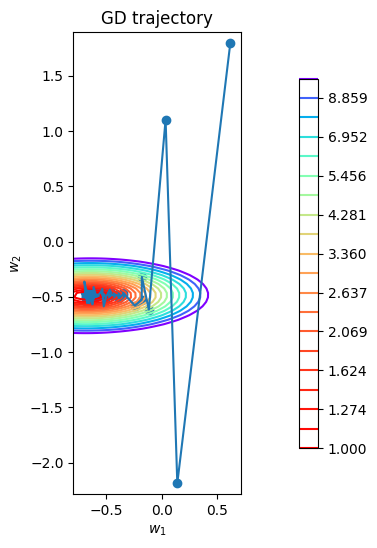

p: 0.2


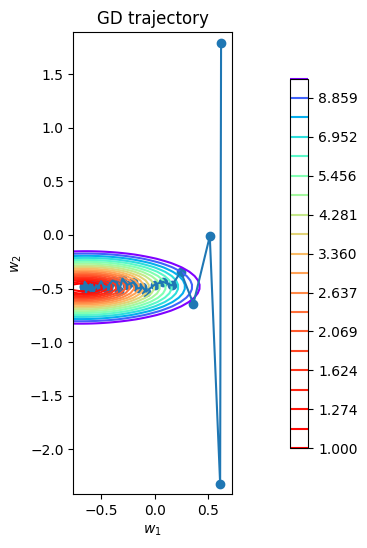

p: 0.5


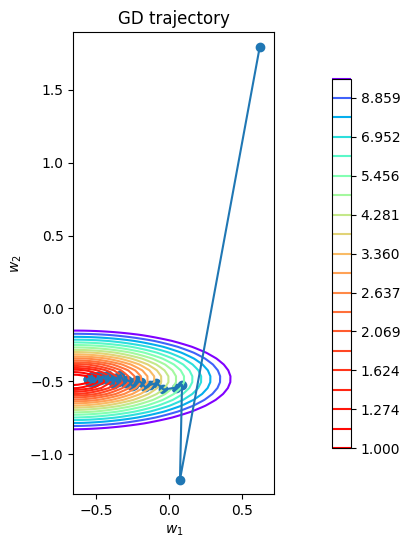

p: 0.8


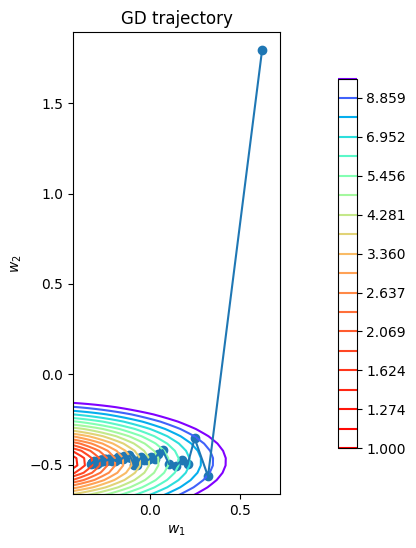

p: 1


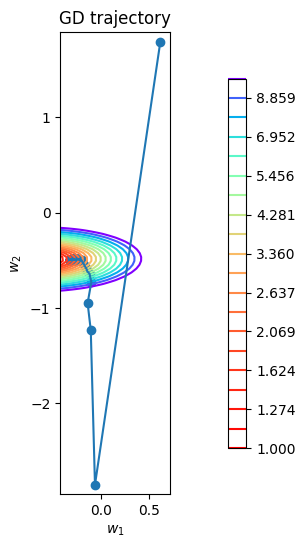

In [ ]:
p_list = [0.1, 0.2, 0.5, 0.8, 1]

for p in p_list:
      print(f"p: {p}")
      story = stochastic_gradient_descent(w_init, X, y, loss, 0.01, 10, p, 80)
      plot_gd(story, X, y, loss)

Маленькие значения - быстрое приближение к минимуму в начале, много шума на более поздних итерациях.

Средние значения - уменьшение шума, но при этом относительное быстрое приближение к минимуму.

Большие значения - более плавное и точное схождение, но медленнее.

**Задание 1.8 (5/8 балла):** Сравните сходимость обычного градиентного спуска и стохастичекой версии:
Нарисуйте график зависимости значения лосса (его можно посчитать при помощи метода `calc_loss`, используя $x$ и $y$ из датасета и $w$ с соответствующей итерации) от номера итерации для траекторий, полученных при помощи обычного и стохастического градиентного спуска с одинаковыми параметрами. Параметр `batch_size` возьмите равным 10.

Видно ли на данном графике преимущество SGD? Почему?

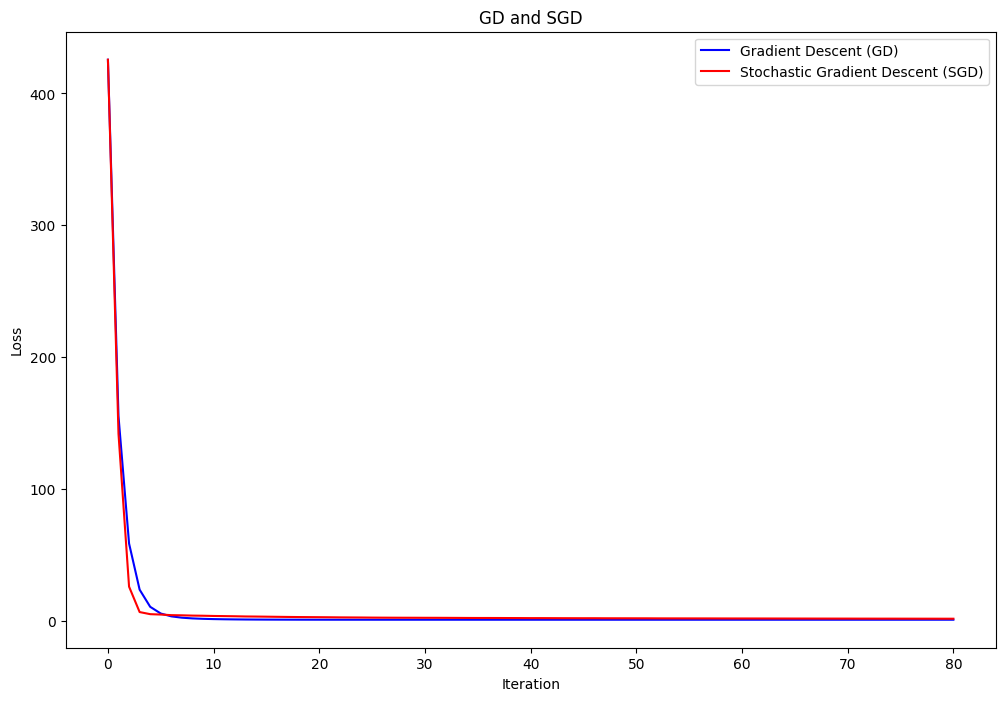

In [ ]:
gd_story = gradient_descent(w_init, X, y, loss, 0.01, 80)
sgd_story = stochastic_gradient_descent(w_init, X, y, loss, 0.01, 10, 0.8, 80)

# Вычисляем значения лосса для каждой траектории
gd_losses = [loss.calc_loss(X, y, w) for w in gd_story]
sgd_losses = [loss.calc_loss(X, y, w) for w in sgd_story]

# Построение графиков
plt.figure(figsize=(12, 8))
plt.plot(gd_losses, label="Gradient Descent (GD)", color="blue")
plt.plot(sgd_losses, label="Stochastic Gradient Descent (SGD)", color="red")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("GD and SGD")
plt.legend()
plt.show()

На ранних итерациях SGD быстрее приближается к минимуму, но при этом на более поздних менее точен.

## Часть 2. Линейная регрессия (5 баллов)

Теперь давайте напишем наш класс для линейной регрессии. Он будет использовать интерфейс, знакомый нам из библиотеки `sklearn`.

В методе `fit` мы будем подбирать веса `w` при помощи градиентного спуска нашим методом `gradient_descent`.

В методе `predict` мы будем применять нашу регрессию к датасету.

**Задание 2.1 (5/8 балла):** Допишите код в методах `fit` и `predict` класса `LinearRegression`.

В методе `fit` вам нужно как-то инициализировать веса `w`, применить `gradient_descent` и сохранить последнюю `w` из траектории.

В методе `predict` вам нужно применить линейную регрессию и вернуть вектор ответов.

Обратите внимание, что объект лосса передаётся в момент инициализации и хранится в `self.loss`. Его нужно использовать в `fit` для `gradient_descent`.

In [ ]:
class LinearRegression:
    def __init__(self, loss: BaseLoss, lr: float = 0.1) -> None:
        self.loss = loss
        self.lr = lr

    def fit(self, X: np.ndarray, y: np.ndarray) -> "LinearRegression":
        X = np.asarray(X)
        y = np.asarray(y)
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        n_features = X.shape[1]
        w_init = np.zeros(n_features)

        story = gradient_descent(w_init, X, y, self.loss, self.lr, n_iterations=100)
        self.w = story[-1]

        return self

    def predict(self, X: np.ndarray) -> np.ndarray:
        # Проверяем, что регрессия обучена, то есть, что был вызван fit и в нём был установлен атрибут self.w
        assert hasattr(self, "w"), "Linear regression must be fitted first"
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])

        return np.dot(X, self.w)

Теперь у нас есть наш класс линейной регрессии. Более того, мы можем управлять тем, какую функцию потерь мы оптимизируем, просто передавая разные классы в параметр `loss` при инициализации.

Пока у нас нет никаких классов кроме `MSELoss`, но скоро они появятся.

Для `MSELoss` мы бы создавали наш объект линейной регрессии, например, так:

In [ ]:
linear_regression = LinearRegression(MSELoss())

Применим нашу регрессию на реальном датасете. Загрузим датасет с машинами, который был у вас на семинарах:

In [ ]:
import pandas as pd

X_raw = pd.read_csv("cars_data.csv", header=None, na_values=["?"], skiprows=1, index_col=0)
X_raw = X_raw[~X_raw[26].isna()].reset_index(drop=True)
X_raw.head(26)


,1,2,3,4,5,6,7,8,9,10,...,17,18,19,20,21,22,23,24,25,26
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.00,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.00,115.0,5500.0,18,22,17450.0
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,15250.0
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,17710.0
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,18920.0
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.30,140.0,5500.0,17,20,23875.0
9,2,192.0,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.80,101.0,5800.0,23,29,16430.0


In [ ]:
y = X_raw[26]
X_raw = X_raw.drop(26, axis=1)

**Задание 2.2 (5/8 балла):** Как обычно обработайте датасет всеми нужными методами, чтобы на нём можно было обучать линейную регрессию:

* Разделите датасет на обучающую и тестовую выборку
* Заполните пропуски
* Нормализуйте числовые признаки
* Закодируйте категориальные переменные

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder


categorical_features = X_raw.select_dtypes(exclude=["float64", "int64"]).columns
X_raw = pd.get_dummies(X_raw, columns=categorical_features, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X_raw, y, test_size=0.3, random_state=52)
scaler = StandardScaler()
X_train.columns = X_train.columns.astype(str)

num_features_train = X_train.select_dtypes(include=["float64", "int64"]).columns
num_features_test = X_test.select_dtypes(include=["float64", "int64"]).columns

X_train[num_features_train] = X_train[num_features_train].apply(lambda x: x.fillna(x.mean()))
X_test[num_features_test] = X_test[num_features_test].apply(lambda x: x.fillna(x.mean()))


X_train_scaled = X_train.copy()
X_train_scaled[num_features_train] = scaler.fit_transform(X_train_scaled[num_features_train])

X_test_scaled = X_test.copy()
X_test_scaled[num_features_test] = scaler.transform(X_test_scaled[num_features_test])
X_train_scaled

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


,1,2,10,11,12,13,14,17,19,20,...,16_three,16_twelve,16_two,18_2bbl,18_4bbl,18_idi,18_mfi,18_mpfi,18_spdi,18_spfi
6,0.173494,1.057997,1.197764,1.514390,2.644647,0.862465,0.548331,0.146398,-0.525533,0.436850,...,False,False,False,False,False,False,False,True,False,False
70,-0.636146,0.000000,3.748970,2.770216,2.788248,1.288223,2.551972,4.003368,1.751327,0.285379,...,False,False,False,False,False,False,False,True,False,False
57,-0.636146,-0.190046,0.015085,0.299336,0.299168,0.777313,-0.275135,-0.167541,0.220978,0.406556,...,False,False,False,True,False,False,False,False,False,False
182,0.983135,-0.799555,-0.238346,-0.198101,-0.179501,0.862465,-0.531282,-0.459056,-0.525533,0.436850,...,False,False,False,False,False,False,False,True,False,False
127,0.983135,0.000000,-0.441091,0.217789,0.347035,-1.351479,-0.180265,0.056701,0.482257,1.951556,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,0.173494,0.187269,-0.711417,-0.720003,-0.993238,0.351555,-1.263673,-0.728147,-0.674836,0.103615,...,False,False,False,True,False,False,False,False,False,False
151,-0.636146,-0.886628,-0.508672,-0.361196,-1.088972,2.310044,1.053036,-0.840268,-1.048092,-0.684033,...,False,False,False,True,False,False,False,False,False,False
13,0.173494,0.000000,0.809169,1.212665,0.490636,0.862465,0.948680,0.774277,-0.077626,-0.199327,...,False,False,False,False,False,False,False,True,False,False
11,-0.636146,1.928724,0.420575,0.217789,-0.514569,0.266403,0.294081,0.774277,-0.077626,-0.199327,...,False,False,False,False,False,False,False,True,False,False


**Задание 2.3 (5/8 балла):** Обучите написанную вами линейную регрессию на обучающей выборке

In [ ]:
linear_regression.fit(X_train_scaled, y_train)

**Задание 2.4 (5/8 балла):** Посчитайте ошибку обученной регрессии на обучающей и тестовой выборке при помощи метода `mean_squared_error` из `sklearn.metrics`.

In [ ]:
from sklearn.metrics import mean_squared_error

y_train_predict = linear_regression.predict(X_train_scaled)

y_test_predict = linear_regression.predict(X_test_scaled)

mse_train = mean_squared_error(y_train, y_train_predict)
mse_test = mean_squared_error(y_test, y_test_predict)
print(f"train: {mse_train}")
print(f"test: {mse_test}")

train: 4870445.367806993
test: 6893043.395800354


Наша модель переобучилась. Давайте как обычно в такой ситуации добавим к ней L2 регуляризацию. Для этого нам нужно написать новый класс лосса.

Формула функции потерь для MSE с L2 регуляризацией выглядит так:
$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2 + \lambda ||w||^2
$$

Или в матричном виде:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2 + \lambda ||w||^2
$$

Где $\lambda$ — коэффициент регуляризации.

Градиент выглядит так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y) + 2 \lambda w
$$

**Задание 2.5 (5/8 балла):** Реализуйте класс `MSEL2Loss`.

Он должен вычислять лосс и градиент по формулам выше.

Подсказка: обратите внимание, что последний элемент вектора `w` — это bias (в классе `LinearRegression` к матрице `X` добавляется колонка из единиц — константный признак). Как мы знаем из лекций и семинаров, bias регуляризовать не нужно. Поэтому не забудьте убрать последний элемент из `w` при подсчёте слагаемого $\lambda||w||^2$ в `calc_loss` и занулить его при подсчёте слагаемого $2 \lambda w$ в `calc_grad`.

In [ ]:
class MSEL2Loss(BaseLoss):
    def __init__(self, coef: float = 1.0):
        """
        :param coef: коэффициент регуляризации (лямбда в формуле)
        """
        self.coef = coef

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета. Последний признак константный.
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии. Последний вес -- bias.
        :output: число -- значения функции потерь
        """

        predict = np.dot(X, w)
        loss = np.mean((predict - y) ** 2)

        w_without_bias = w[:-1]
        reg = self.coef * np.sum(w_without_bias ** 2)

        return loss + reg

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        l = X.shape[0]
        predict = np.dot(X, w)
        grad = (2 / l) * np.dot(X.T, (predict - y))

        reg_add = 2 * self.coef * w
        reg_add[-1] = 0
        return grad + reg_add

Теперь мы можем использовать лосс с l2 регуляризацией в нашей регрессии, например, так:

In [ ]:
linear_regression = LinearRegression(MSEL2Loss(0.02))

**Задание 2.6 (5/8 балла):** Обучите регрессию с лоссом `MSEL2Loss`. Подберите хороший коэффициент регуляризации и добейтесь улучшения результата на тестовой выборке. Сравните результат на обучающей и тестовой выборке с регрессией без регуляризации.

In [ ]:
linear_regression.fit(X_train_scaled, y_train)

y_train_predict = linear_regression.predict(X_train_scaled)

y_test_predict = linear_regression.predict(X_test_scaled)

mse_train_l2 = mean_squared_error(y_train, y_train_predict)
mse_test_l2 = mean_squared_error(y_test, y_test_predict)
print("MSEL2Loss")
print(f"train: {mse_train_l2}")
print(f"test: {mse_test_l2}")
print("MSELoss")
print(f"train: {mse_train}")
print(f"test: {mse_test}")


MSEL2Loss
train: 5195156.777547452
test: 6852622.893617656
MSELoss
train: 4870445.367806993
test: 6893043.395800354


В нашем датасете могут быть выбросы. На семинаре вам рассказывали, что с выбросами хорошо помогает бороться Huber Loss. Вдали от нуля он работает как Mean Absolute Error и не реагирует на выбросы так сильно, как MSE. Давайте его реализуем и применим в нашей регрессии.

Напомним, что функция потерь Huber Loss'а  выглядит так:


$$
    Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \phi_\varepsilon(z) = \begin{cases} \frac 1 2 z^2, - \varepsilon < z < \varepsilon, \\\varepsilon (|z| - \frac 1 2 \varepsilon), иначе \\ \end{cases}
$$


А градиент так:
$$
    \nabla_w Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell x_i \nabla_z \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \nabla_z \phi_\varepsilon(z) = \begin{cases} z, - \varepsilon < z < \varepsilon, \\\varepsilon \text{ sign}(z), иначе \\ \end{cases}
$$

**Задание 2.7 (5/8 балла):** Реализуйте класс `HuberLoss`.

Он должен вычислять лосс и градиент по формулам выше.

In [ ]:
class HuberLoss(BaseLoss):
    def __init__(self, eps: float) -> None:
        """
        :param eps: параметр huber loss из формулы
        """
        self.eps = eps

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: число -- значения функции потерь
        """
        residuals = np.dot(X, w) - y
        abs_res = np.abs(residuals)
        return np.mean(np.where(abs_res < self.eps, 0.5 * abs_res ** 2, self.eps * (abs_res - 0.5 * self.eps)))

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        l = X.shape[0]
        residuals = np.dot(X, w) - y
        abs_res = np.abs(residuals)
        z = np.where(abs_res < self.eps, residuals, self.eps * np.sign(residuals))
        return np.dot(X.T, z) / l

**Задание 2.8 (5/8 балла):** Обучите регрессию с лоссом `HuberLoss`. Сравните результат на обучающей и тестовой выборке с регрессией, обученной c `MSELoss`.

In [ ]:
linear_regression = LinearRegression(HuberLoss(5))

In [ ]:
linear_regression.fit(X_train_scaled, y_train)

y_train_predict = linear_regression.predict(X_train_scaled)

y_test_predict = linear_regression.predict(X_test_scaled)

mse_train_hub = mean_squared_error(y_train, y_train_predict)
mse_test_hub = mean_squared_error(y_test, y_test_predict)
print("HuberLoss")
print(f"train: {mse_train_hub}")
print(f"test: {mse_test_hub}")
print("MSELoss")
print(f"train: {mse_train}")
print(f"test: {mse_test}")

HuberLoss
train: 240113511.28312683
test: 212700774.14653733
MSELoss
train: 4870445.367806993
test: 6893043.395800354


**Задание 3 (0.08/8 балла)**
Вставьте ваш любимый мем 2025 в ячейку ниже:

In [ ]:
# https://www.instagram.com/reel/DIJsqEfu-YE/
# https://vt.tiktok.com/ZSrTX7LBc/
# https://vt.tiktok.com/ZSrTXTXMn/
# это самое вообще смешное, что я видела в этом году
# -- YOUR MEME HERE -- ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz

### БОНУС (2 балла)

Градиентный спуск — далеко не единственный метод оптимизации.
Другой очень известный метод называется ["Алгоритм имитации отжига"](https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%B8%D0%BC%D0%B8%D1%82%D0%B0%D1%86%D0%B8%D0%B8_%D0%BE%D1%82%D0%B6%D0%B8%D0%B3%D0%B0). Он не так часто используется для оптимизации моделей машинного обучения, но у вас есть уникальная возможность попробовать применить его к нашей любимой линейной регрессии.

**Задание (2 балла)**:
Напишите алгоритм имитации отжига для оптимизации MSE линейной регрессии.

Сравните результат с градиентным спуском по "траектории" и по финальному лоссу.

Подсказка: каждую новую точку (веса регресси в нашем случае) можно семплировать из некоторого случайного распределения с центром в текущей точке. Хорошо подойдут распределения с "тяжёлыми" хвостами, например, распределение Стьюдента с параметром количества степеней свободы в районе 3.
Это может выглядеть, например, так:
```
new_w = old_w + np.random.standard_t(3, size=old_w.shape)
```
С параметром распределения можно поэксперементировать: чем он больше, тем реже новые точки будут очень сильно уходить от старых.

In [ ]:
def simulated_annealing(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    initial_temp: float = 1000.0,
    cooling_rate: float = 0.99,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    w = w_init.copy()
    story = [w.copy()]
    current_loss = loss.calc_loss(X, y, w)
    temp = initial_temp

    for _ in range(n_iterations):
        new_w = w + np.random.standard_t(3, size=w.shape)
        new_loss = loss.calc_loss(X, y, new_w)

        delta = new_loss - current_loss

        if delta < 0 or np.random.rand() < np.exp(-delta / temp):
            w = new_w
            current_loss = new_loss
        temp *= cooling_rate

        story.append(w.copy())

    return story

In [ ]:
# Создадим объект лосса
loss = MSELoss()

# Создадим какой-то датасет
X = np.arange(200).reshape(20, 10)
y = np.arange(20)

# Создадим какой-то вектор весов
w = np.arange(10)

sa_story = simulated_annealing(w, X, y, loss=loss, n_iterations=80)
gd_story = gradient_descent(w, X, y, loss, lr=0.01, n_iterations=80)

# plot_gd(sa_story, X, y, loss)
# plot_gd(gd_story, X, y, loss)

In [ ]:



final_loss_sa = loss.calc_loss(X, y, sa_story[-1])
final_loss_gd = loss.calc_loss(X, y, gd_story[-1])
print(f"Final Loss (Simulated Annealing): {final_loss_sa}")
print(f"Final Loss (Gradient Descent): {final_loss_gd}")

Final Loss (Simulated Annealing): 98.15880140134031
Final Loss (Gradient Descent): inf


<ipython-input-3-c5cdfa2ebe5d>:12: RuntimeWarning: overflow encountered in square
  loss = np.mean((predict - y) ** 2)
